## Load picture

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('x-ray.jpg')
cv2.imshow('x-rays',img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

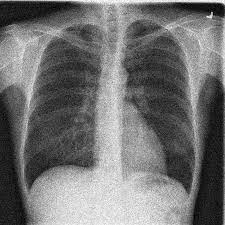

จากรูป เป็นรูปX-rayทรวงอกที่มีnoiseอยู่ ขั้นตอนแรกจึงต้องทำการลดnoiseออกก่อนโดยใช้Median Filterในการเบลอภาพ

## Median Filter

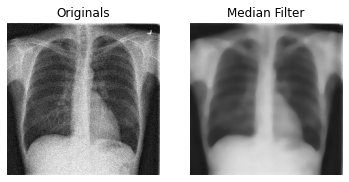

In [6]:
from skimage.util import random_noise
median = cv2.medianBlur(img,11)
plt.subplot(121)
plt.imshow(img,'gray')
plt.title('Originals',fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(median,'gray')
plt.title('Median Filter',fontsize=12)
plt.axis("off")
plt.show()

ใช้ Median Filter รู้สึกว่ารูปมันเบลอมากเกินไปจึงลองเปลี่ยนมาใช้วิธี GaussianBlur ซึ่งรู้สึกว่าผลลัพท์ในการทำ GaussianBlur ดีกว่าเพราะว่ายังมองโครงสร้างภายในทรวงอกง่ายกว่าแบบ Median Filter

## GaussianBlur

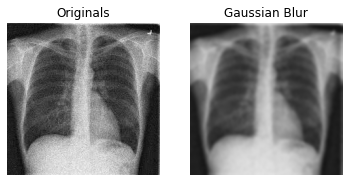

In [5]:
from skimage.util import random_noise
gaussian = cv2.GaussianBlur(img,(11,11),0)
plt.subplot(121)
plt.imshow(img,'gray')
plt.title('Originals',fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(gaussian,'gray')
plt.title('Gaussian Blur',fontsize=12)
plt.axis("off")
plt.show()

จากรูปหลังทำ Gaussian Blur รู้สึกว่ารูปเบลอไปจึงเพิ่ม Sharpen filter เพื่อความคมชัดของภาพ

## Sharpen filter

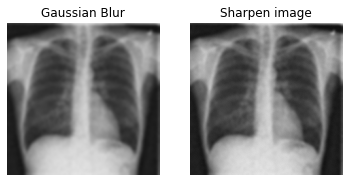

In [84]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(gaussian, ddepth=-9, kernel=kernel)
plt.subplot(121)
plt.imshow(gaussian,'gray')
plt.title('Gaussian Blur',fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(image_sharp,'gray')
plt.title('Sharpen image',fontsize=12)
plt.axis("off")
plt.show()

จากรูปหลังจากทำ Sharpen filter ที่ได้รู้ว่าสว่างไปนิดหน่อยจึงทำ Gamma Correction โดยใช้ Power เพื่อเพิ่มความมืดให้รูป

## Gamma Correction:Power

In [85]:
def GLT(image,transform,coeff=1.0,gamma=1.0):
    if transform == 'negative':
        table = np.array([256-1-i for i in np.arange(0,256)]).astype('uint8')
    elif transform == 'identity':
        table = np.array([i for i in np.arange(0,256)]).astype('uint8')
    elif transform == 'log':
        table = np.array([10*coeff*(np.log10(1+i)) for i in np.arange(0,256)]).astype('uint8')
    elif transform == 'invlog':
        table = np.array([10*coeff/(np.log10(1+i)+1) for i in np.arange(0,256)]).astype('uint8')
    elif transform == 'root':
        invGamma = 1.0/gamma
        table = np.array([coeff*((i/255.0)**invGamma)*255 for i in np.arange(0,256)]).astype('uint8')
    elif transform == 'power':
        table = np.array([coeff*((i/255.0)**gamma)*255 for i in np.arange(0,256)]).astype('uint8')
    return cv2.LUT(image, table)

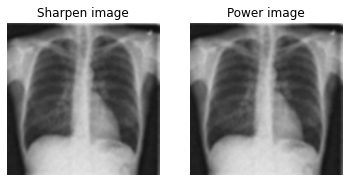

In [90]:
#img = cv2.imread('x-rays.jpg')
transform = 'power'
coeff = 1
gamma = 1
out_img = GLT(image_sharp,transform,coeff=coeff,gamma =gamma)
plt.subplot(121)
plt.imshow(image_sharp,'gray')
plt.title('Sharpen image',fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(out_img,'gray')
plt.title('Power image',fontsize=12)
plt.axis("off")
plt.show()

## Result

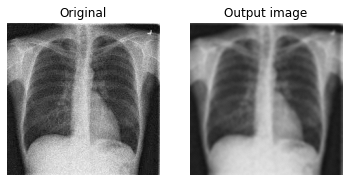

In [91]:
plt.subplot(121)
plt.imshow(img,'gray')
plt.title('Original',fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(out_img,'gray')
plt.title('Output image',fontsize=12)
plt.axis("off")
plt.show() 